# Исследование объявлений о продаже квартир

## Задача проекта

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

## Описание задачи

На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные. Построены гистограммы, боксплоты, диаграммы рассеивания

## Вывод

Цены на недвижимость и количество предложений будут расти по направлению к центру. За близость к историческому центру придется заплатить больше. Так же на стоимость повлияет метраж и количество комнат. А вот выбор этажа может съэкономить, первый этаж обойдется дешевле всех, на втором месте - последний, золотая середина скидок не сделает. Среднее время продажи 178 дней. Медианное время продажи 94 дня. Некоторые квартиры продавались сразу после публикации, а некоторые квартиры "висели" в публикации до четырех лет. Быстрыми продажами можно считать квартиры, которые продавались в течение 45 дней. Медленными - 228 дней. В десяти населенных пунктах с наибольшим числом объявлений самый дорогой квадратный метр жилья в Санкт-Петербурге, самый дешевый в Выборге. Самая высокая стоимость квадратного метра в Зеленогорске, самая низкая в деревне Старополье.

_В ходе исследования изучил и обработал данные: нашёл и изучил пропущенные значения в столбцах, устранил некоторые пропуски, заполнил пропущенные значения там, где это возможно, рассмотрел типы данных в столбцах и преобразовал, где это было необходимо. Изучил уникальные значения в столбце с названиями населенных пунктов и исправил неявные дубликаты (поменял ё на е и городской поселок на поселок городского типа)._

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('real_estate_data.csv', sep = '\t')
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

в 13 из 21 столбцах есть пропуски ceiling_height //	floors_total //	living_area	//	is_apartment	// kitchen_area	// balcony	locality_name	// airports_nearest	// city Centers_nearest	// parks_around3000	// parks_nearest // ponds_around3000	      ponds_nearest	// days_exposition
floors_total - 76 пропусков
locality_name - 49 пропусков

<AxesSubplot:>

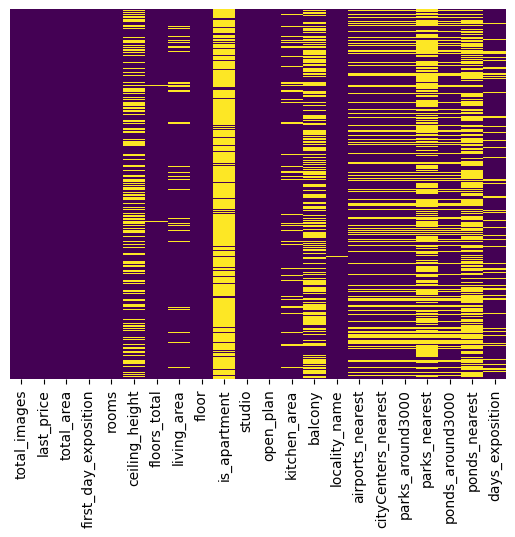

In [10]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<li> ceiling_height - пропуски не меняем не важны // не заполнены так как не знают
<li> floors_total - пропуски важны, не поменять // потеряны
<li> living_area - пропуски важны, не поменять	// потеряны
<li> is_apartment - пропуски важны, не поменять // не заполнены так как не знают
<li> kitchen_area - пропуски важны, не поменять // потеряны
<li> balcony - пропуски важны, менять на 0 - нет балкона // не заполнены
<li> locality_name	- пропуски важны, не поменять // потеряны
<li> airports_nearest - пропуски важны, не поменять // не заполнены 
<li> city Centers_nearest  - пропуски важны, не поменять // не заполнены так как не знают
<li> parks_around3000 - пропуски не меняем не важны // не заполнены так как не знают
<li> parks_nearest - пропуски не меняем не важны // не заполнены так как не знают
<li> ponds_around3000 - пропуски не меняем не важны // не заполнены так как не знают
<li> ponds_nearest	- пропуски не меняем не важны// не заполнены так как не знают
<li> days_exposition - пропуски не меняем не важны // потеряны

In [11]:
#посмотрю значения в столбцах для выявления нестандартных значений на первый взгляд и ошибок
data['parks_nearest'].value_counts()


441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
3.0        1
2847.0     1
1443.0     1
7.0        1
2984.0     1
Name: parks_nearest, Length: 995, dtype: int64

In [12]:
data[data['parks_around3000'].isna()]
#данные с пропущенными значениями

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#заменю пропуски в balcony на 0 и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [14]:
#апартаменты видимо появился не давно, все пропущенные значения заменим на False, 
data['is_apartment'] = data['is_apartment'].fillna(False)

<li>  total_images           int64  
<li>  <b> last_price              float64 меняем на int64 для красоты  </b>
<li>  total_area             float64
<li> <b> first_day_exposition     object меняем на datetime </b>
<li>  rooms                  int64  
<li>   ceiling_height         float64
<li>   floors_total           float64
<li>   living_area            float64
<li>  floor                  int64  
<li>  <b>  is_apartment            object меняем на bool </b>
<li>  studio                 bool   
<li>  open_plan              bool   
<li>  kitchen_area           float64
<li> <b> balcony                   float64 меняем на int64 </b>
<li>  airports_nearest       float64
<li>  cityCenters_nearest    float64
<li>  parks_around3000       float64
<li>  parks_nearest          float64
<li>  ponds_around3000       float64
<li> ponds_nearest           float64
<li> <b> days_exposition           float64 меняем на int64  </b> дни целые

In [15]:

data['last_price'] = data['last_price'].astype('int')

#перевожу столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [17]:
data['first_day_exposition'].value_counts()

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2018-05-20      1
2015-05-15      1
2015-01-12      1
2015-12-19      1
2015-07-19      1
Name: first_day_exposition, Length: 1491, dtype: int64

### Уникальные значения

In [18]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [19]:
data['floors_total'].nunique() # кол-во уникальных зачений

36

In [20]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

#### избавляюсь от неявных дубликатов в колонке locality_name

#### data['locality_name']=data['locality_name'].replace('поселок', 'посёлок') # почему не могу поменять

In [21]:
data['locality_name']=data['locality_name'].replace('поселок Бугры', 'посёлок Бугры')
data['locality_name']=data['locality_name'].replace('поселок городского типа Красный Бор', 'посёлок городского типа Красный Бор')
data['locality_name']=data['locality_name'].replace('поселок Рябово', 'посёлок городского типа Рябово')
data['locality_name']=data['locality_name'].replace('поселок городского типа Рябово', 'посёлок городского типа Рябово')
data['locality_name']=data['locality_name'].replace('поселок Пансионат Зелёный Бор', 'посёлок Пансионат Зелёный Бор')
data['locality_name']=data['locality_name'].replace('поселок Тельмана', 'посёлок Тельмана')
data['locality_name']=data['locality_name'].replace('поселок городского типа Лебяжье', 'посёлок городского типа Лебяжье')

In [22]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [23]:
data=data.replace({'ceiling_height':{22.6:2.26, 100:1, 24:2.4, 20:2, 25:2.5}})


In [24]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36, 32.  ,  3.08,  3.68,  3.07,
        3.37,  3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,
        4.37,  2.68,  3.22,  3.27, 27.  ,  4.1 ,  2.93,  3.46,  3.47,
        3.33,  3.63,

In [25]:
data.sort_values('total_area', ascending=False) # Сортировка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106
12859,20,140000000,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,0
3117,19,140000000,631.0,2019-03-30,7,NaN,5.0,NaN,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,0
15651,20,300000000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19558,2,1686000,13.2,2018-12-17,1,NaN,5.0,NaN,1,False,...,NaN,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19
19807,0,3800000,13.0,2018-07-04,1,NaN,5.0,10.0,3,False,...,NaN,0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9
19546,3,1850000,13.0,2019-03-11,1,3.40,5.0,NaN,2,False,...,NaN,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24
17961,3,1400000,13.0,2017-12-03,1,2.60,9.0,NaN,1,False,...,NaN,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410


In [26]:
data.sort_values('rooms', ascending=True)
# значения rooms равное о, выбиваются, но их всего 197 - не исказят картину

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9412,5,2100000,16.0,2017-12-10,0,NaN,6.0,13.0,1,False,...,NaN,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3
8886,10,2450000,15.5,2018-08-22,0,NaN,5.0,10.0,2,False,...,NaN,0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27
18132,6,4800000,32.5,2019-04-09,0,2.80,17.0,22.9,5,False,...,NaN,2,Санкт-Петербург,43996.0,13576.0,1.0,396.0,0.0,NaN,0
20002,8,2700000,28.0,2017-11-10,0,NaN,21.0,20.0,6,False,...,NaN,2,Санкт-Петербург,21460.0,16788.0,0.0,NaN,1.0,170.0,17
21425,4,2700000,25.7,2018-01-01,0,2.70,24.0,18.5,19,False,...,NaN,2,Санкт-Петербург,41606.0,11678.0,0.0,NaN,0.0,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,5,25000000,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418
20829,6,28659000,245.4,2016-03-31,14,NaN,4.0,168.3,2,False,...,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14
18848,6,28500000,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365


In [27]:
data['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [28]:
data['days_exposition'].value_counts()

0       3181
45       880
60       538
7        234
30       208
        ... 
1021       1
1362       1
1105       1
795        1
971        1
Name: days_exposition, Length: 1142, dtype: int64

In [29]:
data.sort_values('days_exposition', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18843,11,3500000,48.20,2014-12-15,2,2.50,5.0,27.4,2,False,...,7.7,3,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580
1109,1,34878556,95.80,2014-12-09,2,NaN,6.0,58.3,5,True,...,20.0,1,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572
9553,11,10600000,80.00,2014-12-09,3,2.85,17.0,44.0,9,False,...,15.0,0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553
1885,2,13300000,79.60,2014-12-09,2,3.00,8.0,42.7,7,False,...,18.0,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513
20969,18,13300000,133.00,2015-02-11,4,3.00,5.0,58.0,2,False,...,45.0,0,Санкт-Петербург,24653.0,5032.0,0.0,NaN,1.0,534.0,1512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13860,19,6550000,55.50,2019-04-22,2,2.50,9.0,NaN,3,False,...,11.0,0,Санкт-Петербург,29638.0,13663.0,0.0,NaN,1.0,842.0,0
13856,16,14490000,160.00,2019-03-06,3,2.95,3.0,95.0,3,False,...,22.0,0,Санкт-Петербург,22650.0,2173.0,0.0,NaN,1.0,367.0,0
13854,3,5850000,48.75,2019-04-15,2,2.70,25.0,27.0,16,False,...,8.6,2,Санкт-Петербург,37534.0,14377.0,0.0,NaN,0.0,NaN,0
13849,19,4798000,100.00,2018-11-07,4,2.50,5.0,62.6,1,False,...,8.4,0,деревня Лесколово,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
# нет домов выше 36 этажей, поэтому меняем 60 на 6 и 52 на 5 этажные дома
data=data.replace({'floors_total':{60:6, 52:5}})

In [31]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [32]:
data.sort_values('living_area', ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21758,0,2330000,23.00,2018-01-01,0,NaN,24.0,2.0,22,False,...,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66
13915,20,6350000,52.00,2018-02-06,2,3.00,6.0,2.0,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91
23574,14,64990000,139.00,2015-11-24,3,3.00,8.0,3.0,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280
3242,7,4440000,41.00,2017-07-02,1,NaN,17.0,3.0,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216
17582,11,2680000,22.00,2018-08-11,0,NaN,25.0,5.0,8,False,...,NaN,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12.0,NaN,5,False,...,NaN,0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60
23663,12,6400000,88.00,2018-01-12,4,2.55,10.0,NaN,1,False,...,NaN,0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59
23670,9,2450000,45.60,2018-02-08,1,2.80,9.0,NaN,2,False,...,NaN,0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45
23679,0,2500000,35.00,2017-12-08,1,NaN,9.0,NaN,4,False,...,NaN,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45


In [33]:
df_living_area = data[data['living_area'] < 10]
print (df_living_area)
# строка 23574 выбивается, из общей жилой площади 139 м2, только 3м3 жилой
# жилая полощадь < 10 только у 25 объявлений - не большой разброс не повлияют на анализ

       total_images  last_price  total_area first_day_exposition  rooms  \
114               5     4000000       21.40           2019-02-07      1   
680              14     7200000       43.00           2017-10-31      1   
1326              8     8100000       52.00           2017-01-29      2   
2309             10     4200000       62.40           2017-06-15      2   
3242              7     4440000       41.00           2017-07-02      1   
4100             17     5300000       34.80           2017-06-19      1   
4542             12     3300000       18.00           2018-11-07      1   
7312              8     3400000       27.00           2018-02-21      2   
8325              9     4800000       52.00           2017-10-25      2   
13915            20     6350000       52.00           2018-02-06      2   
15833            20     4600000       33.00           2017-01-01      1   
16431            13     3799000       31.00           2018-04-12      1   
17248            20     5

In [34]:
#посчитаю цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']
# сделаю удобней цену
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000


In [35]:

#создаю столбец дня недели
data['weekday_of_publication'] = data['first_day_exposition'].dt.weekday

#создаю столбец месяца
data['month_of_publication'] = data['first_day_exposition'].dt.month

#создаю столбец года
data['year_of_publication'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_of_publication,month_of_publication,year_of_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018


In [36]:
#напишу функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    #категоризую этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

In [37]:
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest'].head(20)

0     16.028
1     18.603
2     13.933
3      6.800
4      8.098
5        NaN
6     19.143
7     11.634
8        NaN
9     15.008
10    13.878
11    51.677
12       NaN
13    33.058
14    30.759
15    14.259
16    10.698
17    14.616
18    10.842
19    12.843
Name: cityCenters_nearest, dtype: float64

In [38]:
#заменю пропуски в cityCenters_nearest на 0 и изменю тип данных на int
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')

In [39]:
data.round({'cityCenters_nearest' : 2})
data['cityCenters_nearest'].head(20)

0     16
1     18
2     13
3      6
4      8
5      0
6     19
7     11
8      0
9     15
10    13
11    51
12     0
13    33
14    30
15    14
16    10
17    14
18    10
19    12
Name: cityCenters_nearest, dtype: int32

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int32         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

## Провожу исследовательский анализ данных

<b> Изучаю общую площадь

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

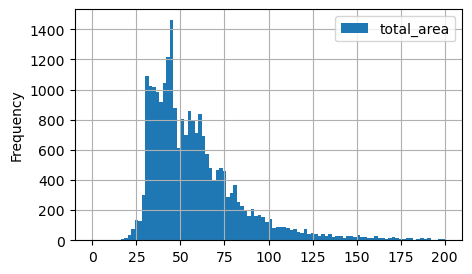

In [41]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200))
data['total_area'].describe()


Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ
По гистограмме кроме распределения нечего больше указать, с помошью describe получил общее представление

<b> Изучаю жилую площадь

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

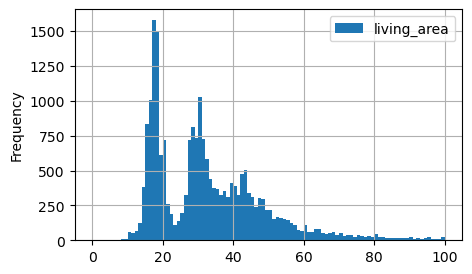

In [42]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,100))
data['living_area'].describe()


Распределение данных не нормальное, есть выбросы но они не сильно влияют на анализ
Есть провал в районе 19 до 30 - связан с тем что жилая площадь увеличивается в 2 раза
Большинство квартир с жилой площадью от 15-25 квадратных метров. Убрал аномально большие и аномально маленькие значения. Но все равно тяжело представить квартиры с жилой площадью 10 метров. Возможно это квартиры студии.

<b> Изучаю площадь кухни

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

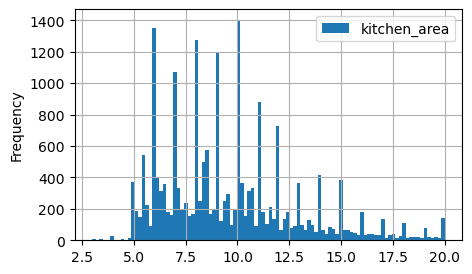

In [43]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (3,20))
data['kitchen_area'].describe()

Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ
По гистограмме кроме распределения нечего больше указать

<b> Изучаю цену объекта

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

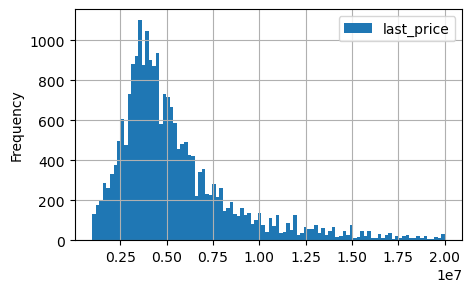

In [44]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (1000000,20000000))
data['last_price'].describe()


Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ
По гистограмме кроме распределения нечего больше указать.

<b> Изучаю количество комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

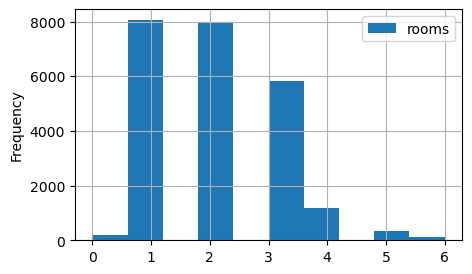

In [45]:
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0,6))
data['rooms'].describe()


Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ
Большинство квартир имеют от нуля до трех комнат. Студии, вероятно, имеют 0 количество комнат.

<b> Изучаю высоту потолков

count    14504.000000
mean         2.749681
std          0.788131
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

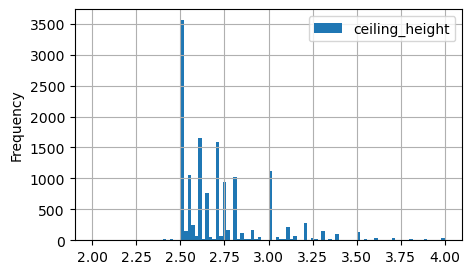

In [46]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (2,4))
data['ceiling_height'].describe()

Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ


<b> Изучаю этажы квартир

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

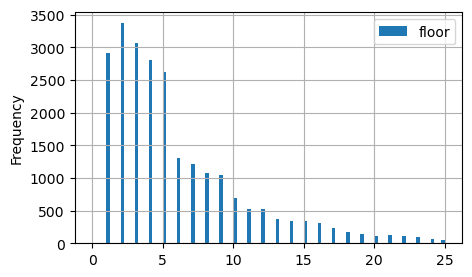

In [47]:
data.plot(y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,25))
data['floor'].describe()

Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ
Большинство квартир располагаются на 1-5 этажах

<b> Изучаю типы квартир

In [48]:
agg_func_math = {'floor': ['describe']}
data.groupby(['floor_category']).agg(agg_func_math).round(2)


floor                                      
               describe                                      
                  count  mean   std  min  25%  50%  75%   max
floor_category                                               
другой          17362.0  6.45  4.82  2.0  3.0  5.0  8.0  33.0
первый           2917.0  1.00  0.00  1.0  1.0  1.0  1.0   1.0
последний        3336.0  7.17  4.81  2.0  5.0  5.0  9.0  27.0

Кол-во самых дешёвых вариантов, первый и последний этаж от всех продаж составляет около 35%
Большинство домов 5 и 9 этажные. Максимальная этажность 33 этажа

<b> Изучаю общее количество этажей в доме

count    23613.000000
mean        10.669546
std          6.584040
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

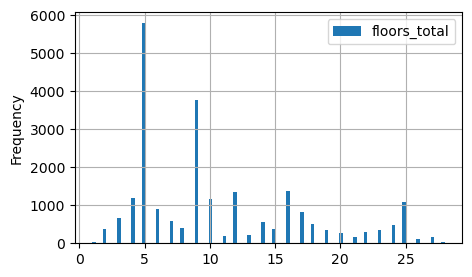

In [49]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (1,28))
data['floors_total'].describe()

Большинство домов 5 и 9 этажные. Квартиры в высотках 12, 16, 17, 25 этажных прдаются примерно на одном уровне.
Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ

<b> Изучаю расстояние до центра города в метрах

count    23699.00
mean        10.51
std          9.51
min          0.00
25%          2.00
50%         11.00
75%         15.00
max         65.00
Name: cityCenters_nearest, dtype: float64

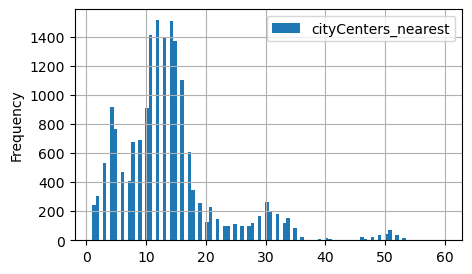

In [53]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (1,60))
data['cityCenters_nearest'].describe().round(2)

Меньше 25% объявлений в радиусе 2-х км от центра города. Основая часть объявлений из окраины в диаметре от 10 до 17 км до центра. 
Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ

<b> Изучаю расстояние до ближайшего парка

count    8079.00
mean      490.80
std       342.32
min         1.00
25%       288.00
50%       455.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: float64

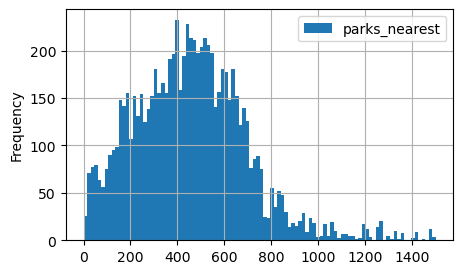

In [54]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,1500))
data['parks_nearest'].describe().round(2)

Только 30 % объявлений заполнило. Для общих выводов мало данных.
Распределение данных нормальное, есть выбросы но они не сильно влияют на анализ
Большинство домов из объявлений в близи парков не далее 600 метров

<b> Изучаю в какие дни публикуются объявления

count    23699.00
mean         2.57
std          1.79
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: weekday_of_publication, dtype: float64

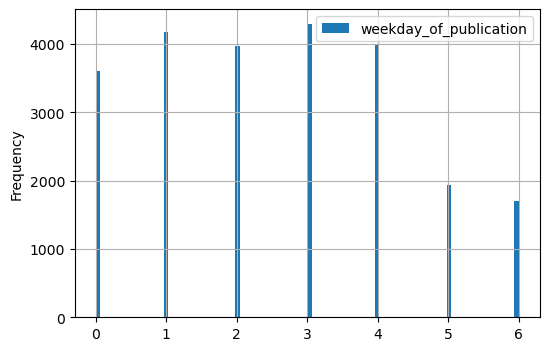

In [58]:
data.plot(y = 'weekday_of_publication', kind = 'hist', bins = 100, grid=True, figsize = (6,4), range = (0,6))
data['weekday_of_publication'].describe().round(2)


На выходных меньше публикуют объявлений. В будни меньше публикуют в понедельник.

<b>  Изучаю в какие месяцы публикуются объявления

count    23699.00
mean         6.40
std          3.49
min          1.00
25%          3.00
50%          6.00
75%         10.00
max         12.00
Name: month_of_publication, dtype: float64

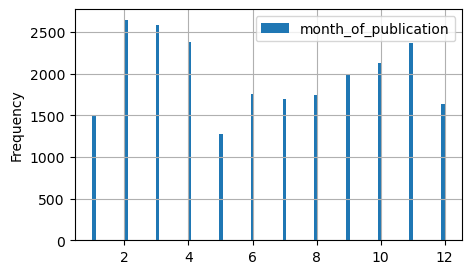

In [60]:
data.plot(y = 'month_of_publication', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (1,12))
data['month_of_publication'].describe().round(2)

Высокий сезон продаж с февраля по апрель и с сентября по октябрь. 
Менее активыне месяцы летом с мая по август и зимой в декабре и январе.

<b>  Изучаю времена продажи квартиры

45      880
60      538
7       234
30      208
90      204
       ... 
1021      1
1362      1
1105      1
795       1
971       1
Name: days_exposition, Length: 1141, dtype: int64

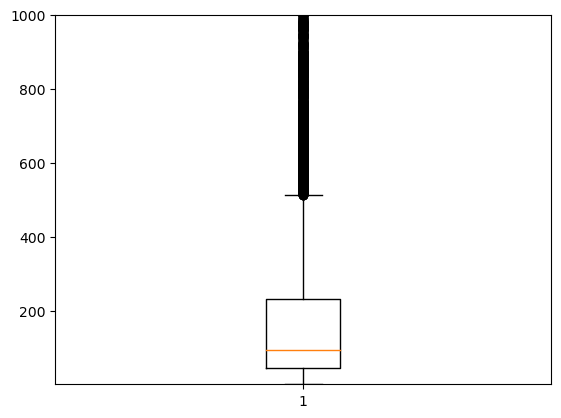

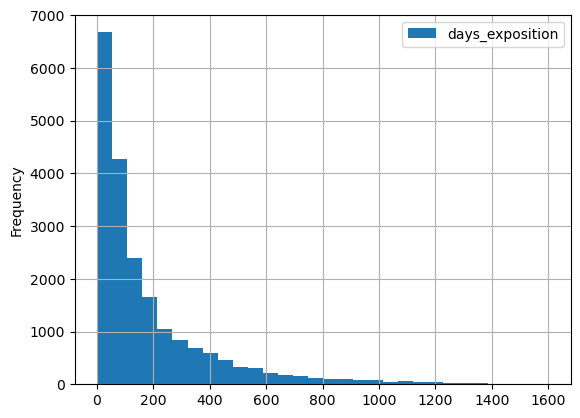

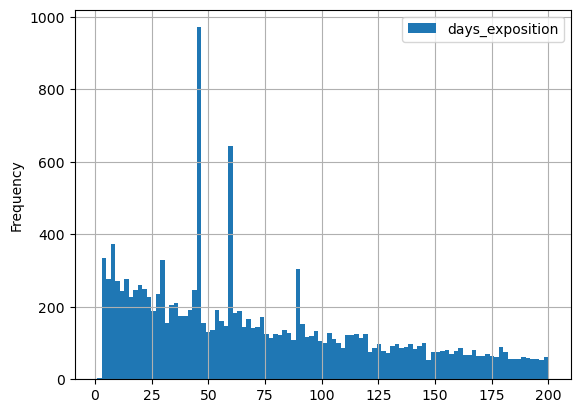

In [61]:
#диаграмма размаха
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
data[data['days_exposition']!=0]['days_exposition'].value_counts()


In [62]:

data.query('days_exposition != 0')['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Более 75% продаж проходит в течение 7 месяцев (232 дней)
В среднем квартира продаётся в течение 6 месяцев, если меньше 70 дней, то быстро
Если квартира продаётся больше 10 месяцев - это медлено
Аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления - 
Именно после этих сроков объявление считается неактуальным и снимается
Наверное нужно убрать эти значения из выборки

## Как влияют другие факторы на цену

### Линейный коэффициент корреляции r-Пирсона
Коэффициент корреляции Пирсона (r-Пирсона) - это статистический показатель, который измеряет силу и направление линейной связи между двумя переменными. Он принимает значения от -1 до 1. Значение 1 означает идеальную прямую положительную корреляцию, -1 - идеальную прямую отрицательную корреляцию, а 0 - отсутствие линейной корреляции.  Он может помочь в выявлении зависимостей между переменными и принятии решений на основе данных.

In [ ]:
data.info()

### Изучаю зависимость цены от общей площади квартиры.

0.30196014387792564

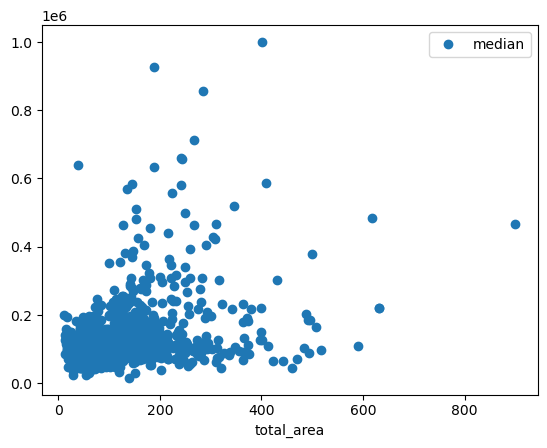

In [64]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['price_per_square_meter'])

<b> Вывод: видим, что зависимость очень слабая - согласно корреляции Пирсона - 0.3! 
То есть, чем больше площадь тем немного выше стоимость!

### Изучаю зависимость цены от жилой площади

0.22634636090992574

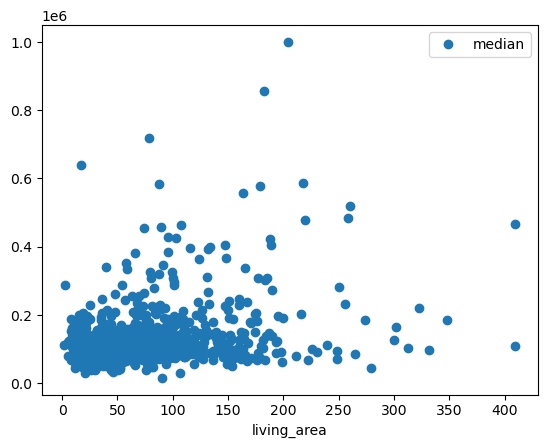

In [65]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['price_per_square_meter'])

<b> Вывод: видим, что зависимость очень слабая - согласно корреляции Пирсона - 0.22! 
То есть, чем больше жилая площадь тем больше стоимость!

### Изучаю зависимость цены от площади кухни

0.39749345107953005

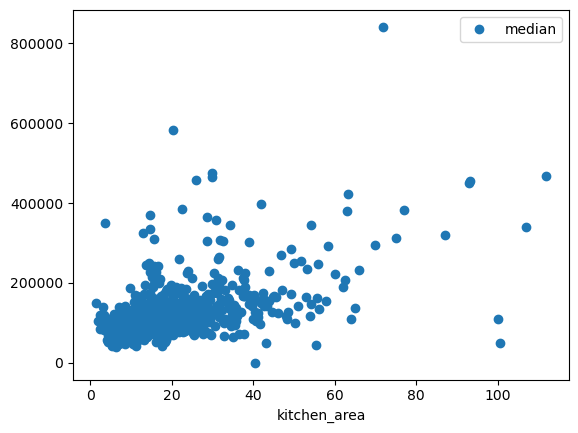

In [66]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o')

pivot_table_kitchen_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['price_per_square_meter'])

Здесь тоже видим прямую зависимость. Видимо любое увеличение площади ведет за собой увеличение цены.

### Изучаю зависимость цены от кол-ва комнат

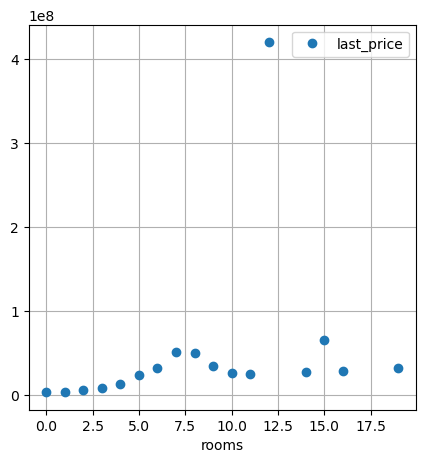

In [68]:
data.pivot_table(index='rooms', values='last_price')

data.pivot_table(index='rooms', values=['kitchen_area', 'last_price']).corr()  

data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

Самая низкая цена у студий. С возрастание количества комнат цена растет.

### Изучаю зависимость цены от типа этажа (первый, последний и т.д.)

,mean,count,median
floor_category,,,
первый,81983.111759,2917,81223
последний,93410.267686,3336,87777


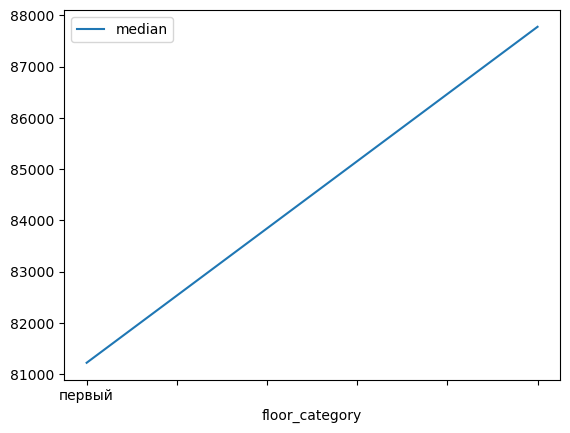

In [69]:
pivot_table_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
 # смотрю по категории другой
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

<b> Вывод: cамые дешевые квартиры на первом этаже. Квартиры на средних этажах дороже, чем на последних.

### Изучаю зависимость цены от даты размещения

,mean,count,median
weekday_of_publication,,,
1,99734.089410,4183,95634.0
2,99616.731002,3974,95473.0
3,100162.466356,4295,95143.0
0,99437.994463,3612,94688.0
4,99011.697000,4000,94616.0
6,97707.917010,1699,94501.0
5,99017.722107,1936,93545.5


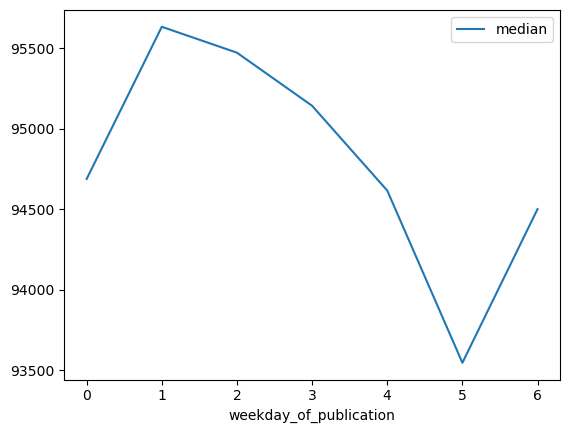

In [71]:
pivot_table_weekday_of_publication = data.pivot_table(index = 'weekday_of_publication', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_of_publication.columns = ['mean', 'count', 'median']
pivot_table_weekday_of_publication.plot(y = 'median')

pivot_table_weekday_of_publication.sort_values('median', ascending = False)

<b> Вывод: ко вторнику цены самые высокие, к субботу самые низкие

,mean,count,median
month_of_publication,,,
4,101948.567045,2379,96451
8,100110.094037,1744,96026
9,100463.814740,1981,95607
11,99230.427246,2371,95588
3,98972.768844,2587,95238
1,99862.139333,1500,95222
2,98768.292045,2640,95000
7,99625.190560,1695,95000
12,99574.280926,1641,94262


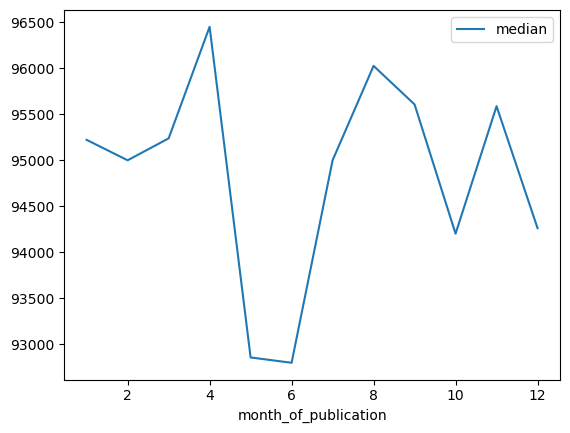

In [72]:
pivot_table_month_of_publication = data.pivot_table(index = 'month_of_publication', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_of_publication.columns = ['mean', 'count', 'median']
pivot_table_month_of_publication.plot(y = 'median')

pivot_table_month_of_publication.sort_values('median', ascending = False)

<b> Вывод: Больше всего выставляют объявления в апреле, в августе и сентябре. Меньше всего летом в мае и июне. 

,mean,count,median
year_of_publication,,,
2014,124830.000000,137,107000.0
2019,107123.332060,2879,103305.0
2018,97773.107290,8519,95689.0
2015,104613.756507,1191,93414.0
2017,97621.434188,8190,92564.5
2016,98321.900467,2783,91743.0


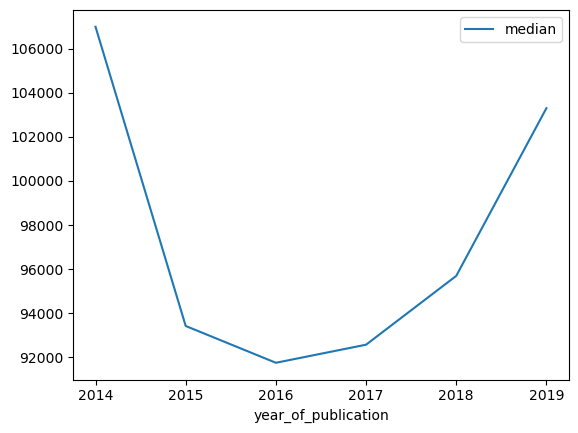

In [73]:
pivot_table_year_of_publication = data.pivot_table(index = 'year_of_publication', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_of_publication.columns = ['mean', 'count', 'median']
pivot_table_year_of_publication.plot(y = 'median')

pivot_table_year_of_publication.sort_values('median', ascending = False)

<b>  Вывод: цена растёт начиная с 2016 года

In [74]:
pivot_table_locality_name = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
pivot_table_locality_name.columns = ['count', 'mean']
pivot_table_locality_name = pivot_table_locality_name.sort_values('count', ascending = False).head(10)
pivot_table_locality_name

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [75]:
#самая высокая стоимость
pivot_table_locality_name[pivot_table_locality_name['mean']==pivot_table_locality_name['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


In [76]:
#самая низкая стоимость
pivot_table_locality_name[pivot_table_locality_name['mean']==pivot_table_locality_name['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.489451


In [77]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km']

0        0.016
1        0.018
2        0.013
3        0.006
4        0.008
         ...  
23694    0.004
23695    0.000
23696    0.000
23697    0.010
23698    0.000
Name: cityCenters_nearest_km, Length: 23699, dtype: float64

In [78]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km

,price_per_square_meter
cityCenters_nearest_km,
0.000,174401.571429
0.001,166603.312500
0.002,146662.420195
0.003,129415.891635
0.004,137475.039691
0.005,146978.789337
0.006,152277.455319
0.007,141399.287469
0.008,120580.929851
